In [9]:
!pip install shap

   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 545.3/545.3 kB 9.1 MB/s eta 0:00:00

   ------------------------------ --------- 3/4 [shap]
   ------------------------------ --------- 3/4 [shap]
   ------------------------------ --------- 3/4 [shap]
   ------------------------------ --------- 3/4 [shap]
   ---------------------------------------- 4/4 [shap]




[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import shap

In [11]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Load and preview data
df = pd.read_csv(r"C:\Users\den19\OneDrive\Рабочий стол\Обучение\Развитие Machine Learning\housing_new.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
# View summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<Axes: xlabel='total_bedrooms'>

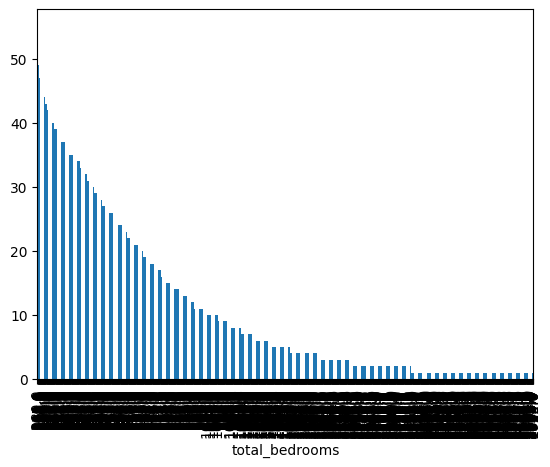

In [14]:
# Plot the distribution of total bedrooms
df['total_bedrooms'].value_counts().plot.bar()


Категориальные колонки: ['ocean_proximity']

MSE без median_income: 2470445959.58


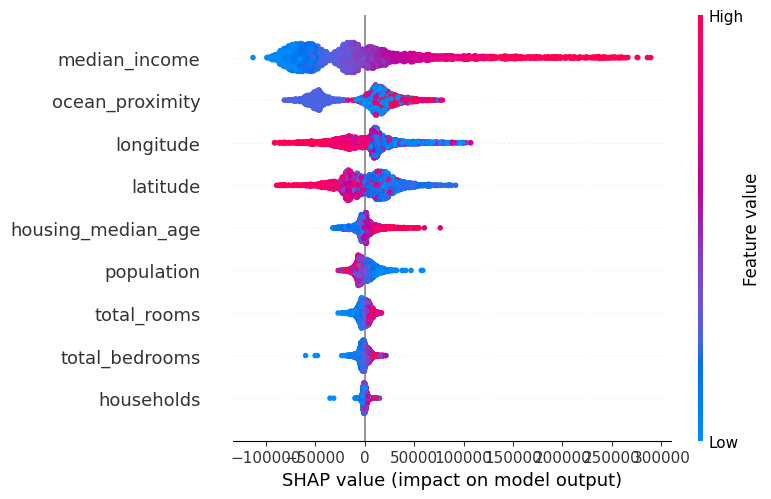


Средние абсолютные SHAP значения:
latitude     19552.025098
longitude    21659.181493
dtype: float64


In [18]:
from sklearn.preprocessing import OrdinalEncoder
# 2. Подготовка данных
# Выделяем категориальные колонки
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"\nКатегориальные колонки: {cat_cols}")

# Кодируем категориальные признаки
if len(cat_cols) > 0:
    encoder = OrdinalEncoder()
    df[cat_cols] = encoder.fit_transform(df[cat_cols])

# Разделяем на признаки и целевую переменную
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# 3. Обучение модели
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 4. Расчет MSE без median_income
X_train_no_income = X_train.drop('median_income', axis=1)
X_test_no_income = X_test.drop('median_income', axis=1)

model_no_income = RandomForestRegressor(n_estimators=100, random_state=42)
model_no_income.fit(X_train_no_income, y_train)

y_pred_no_income = model_no_income.predict(X_test_no_income)
mse_no_income = mean_squared_error(y_test, y_pred_no_income)
print(f"\nMSE без median_income: {mse_no_income:.2f}")

# 5. SHAP анализ
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)

# Средние абсолютные SHAP значения
shap_df = pd.DataFrame(shap_values, columns=X_test.columns)
mean_abs_shap = shap_df.abs().mean()
print("\nСредние абсолютные SHAP значения:")
print(mean_abs_shap[['latitude', 'longitude']])